# Create a Python notebook showing statistical descriptions, comparisons, and time-series analysis of all the meters after aggregating it to an hourly frequency

         year     moy_date     doy_date       busday     dow_date  \
count  8760.0  8760.000000  8760.000000  8760.000000  8760.000000   
mean   2017.0     6.526027   183.000000     0.682192     3.991781   
std       0.0     3.448048   105.372043     0.465651     2.003519   
min    2017.0     1.000000     1.000000     0.000000     1.000000   
25%    2017.0     4.000000    92.000000     0.000000     2.000000   
50%    2017.0     7.000000   183.000000     1.000000     4.000000   
75%    2017.0    10.000000   274.000000     1.000000     6.000000   
max    2017.0    12.000000   365.000000     1.000000     7.000000   

              hour         temp        humid           r1           r2  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     11.500000    28.658419    66.912808     0.224942     0.228293   
std       6.922582     2.851937    18.325252     0.139805     0.196766   
min       0.000000    17.500000    14.160000     0.010500     0.004400   
25%     

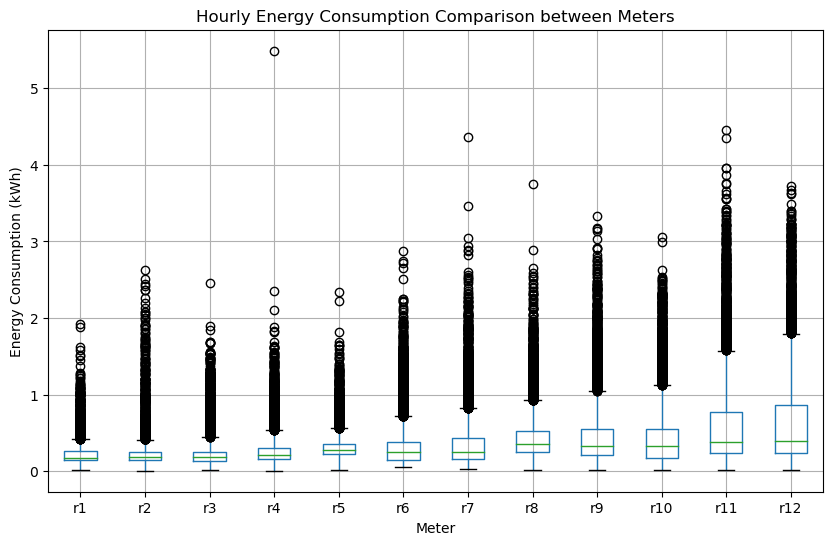

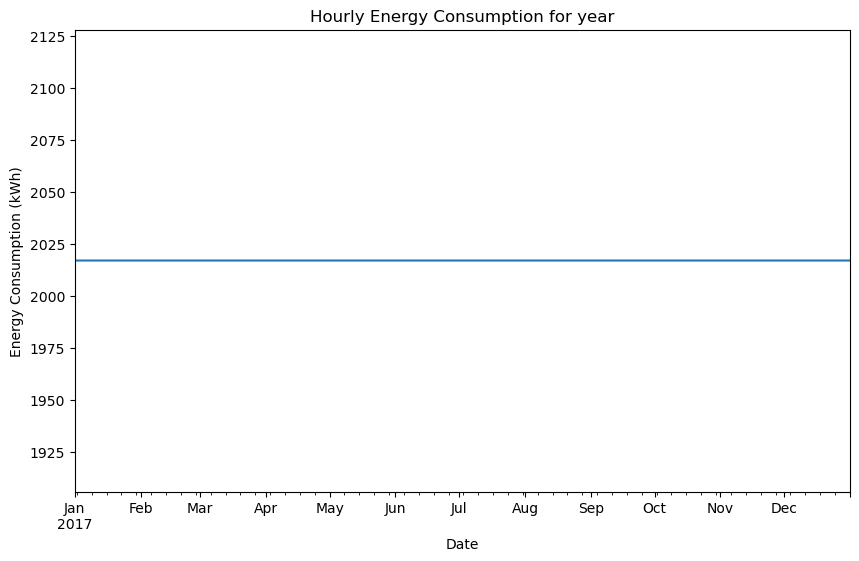

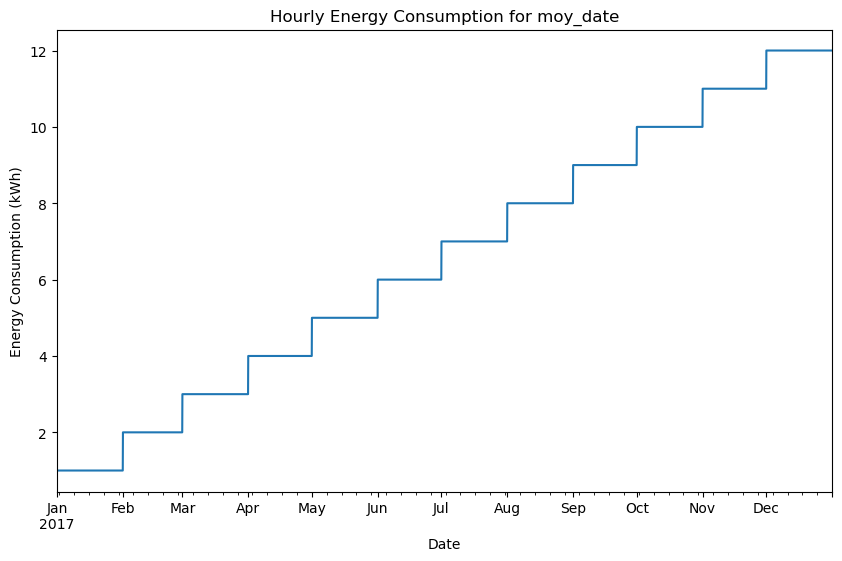

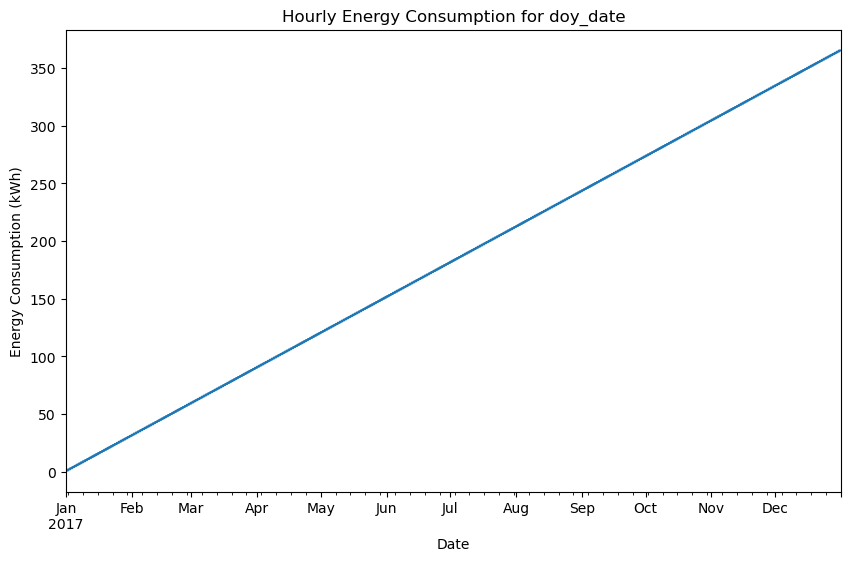

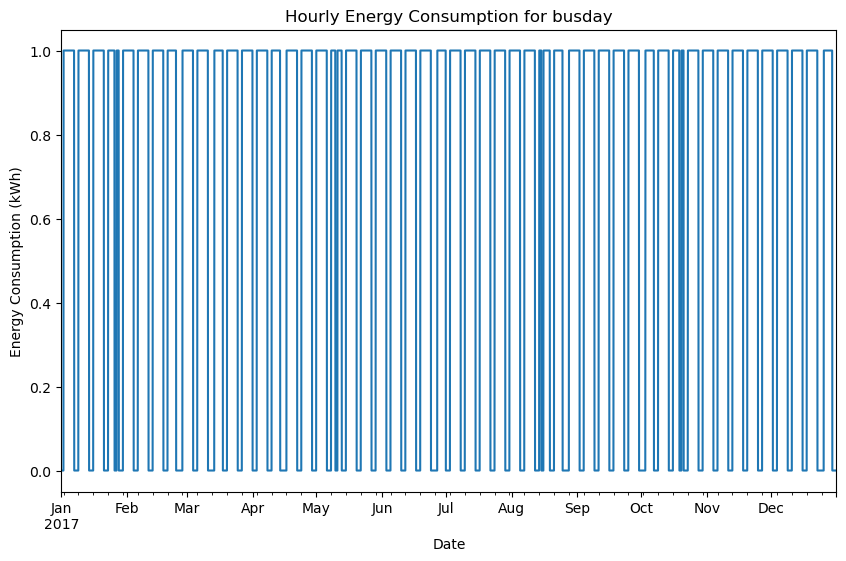

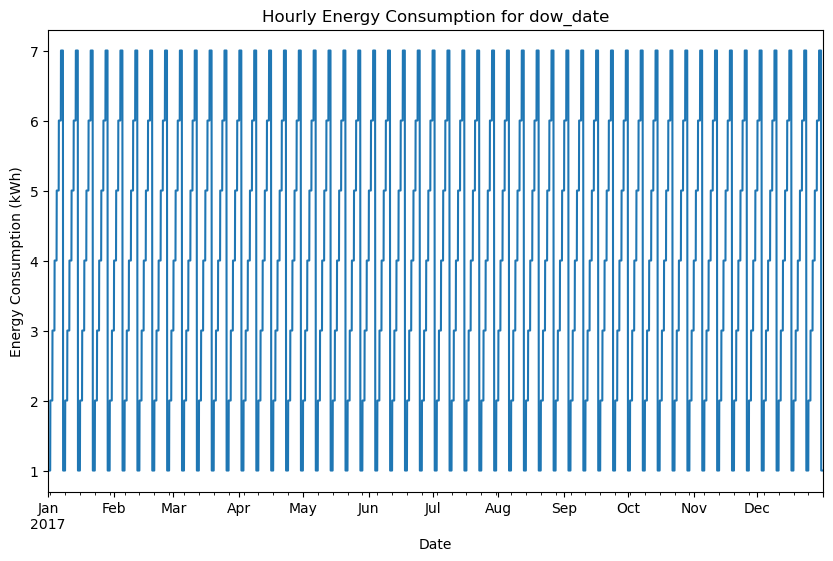

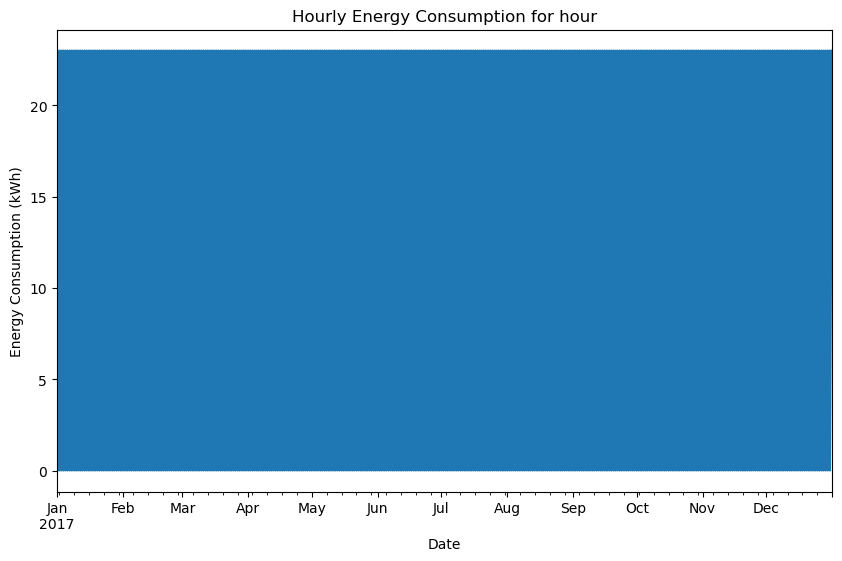

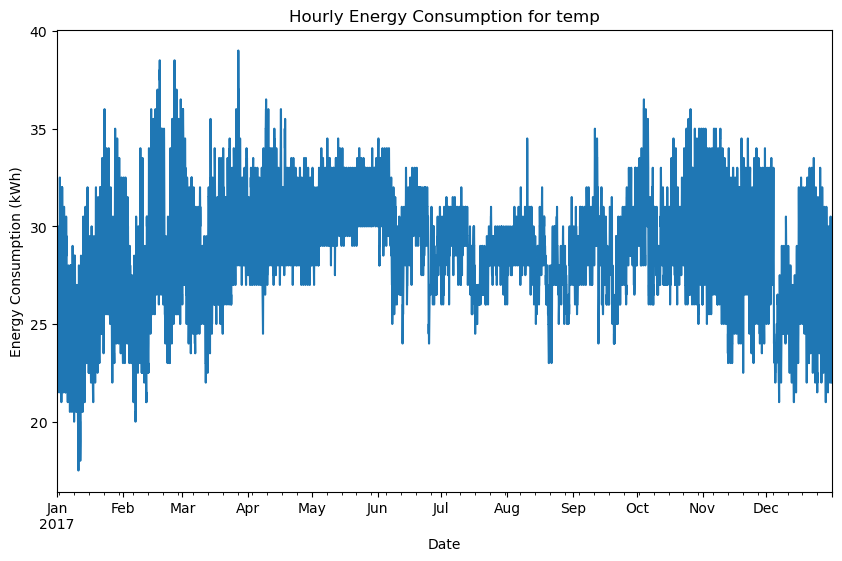

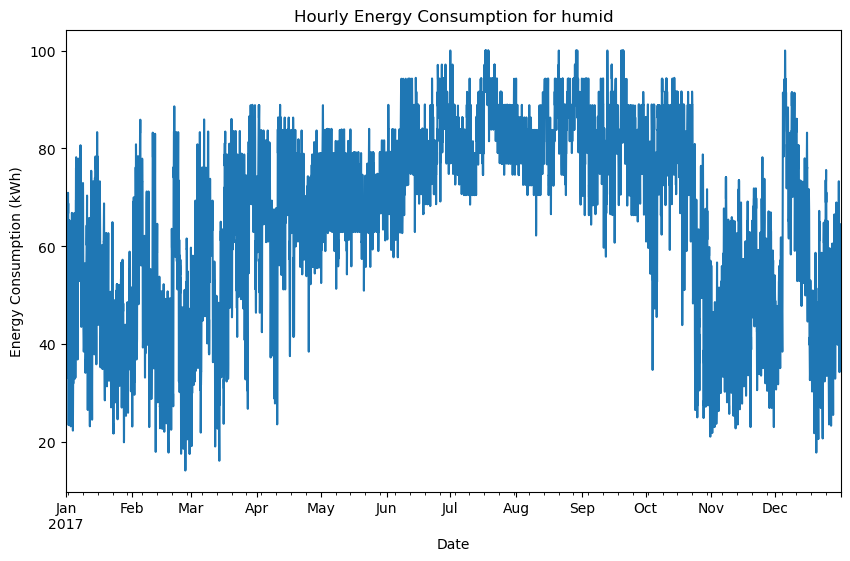

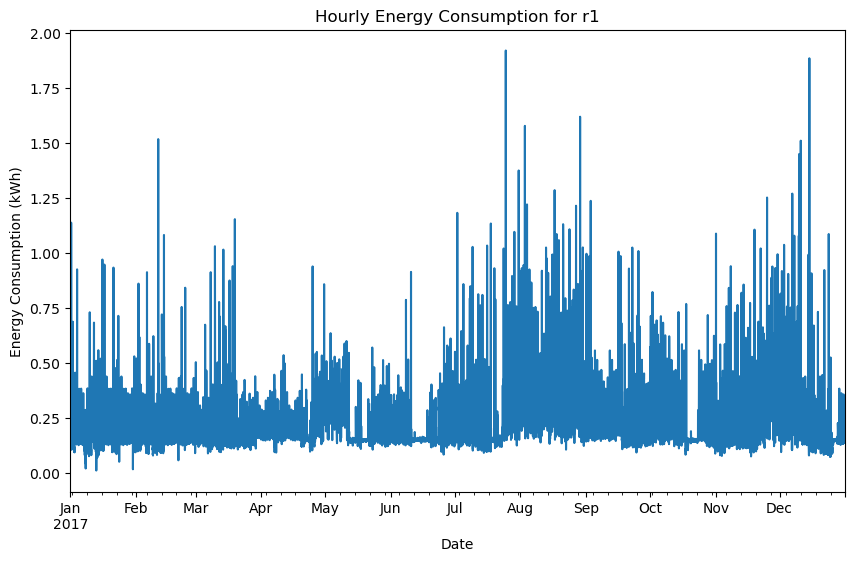

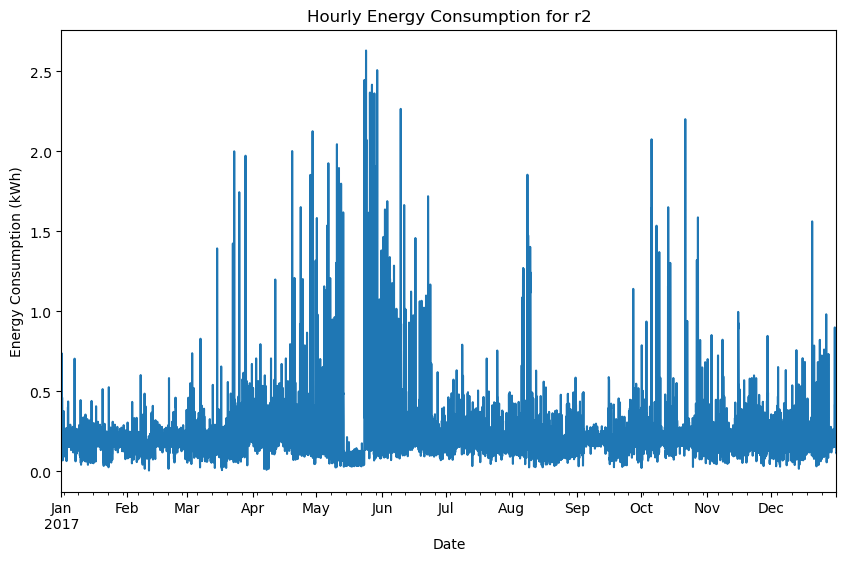

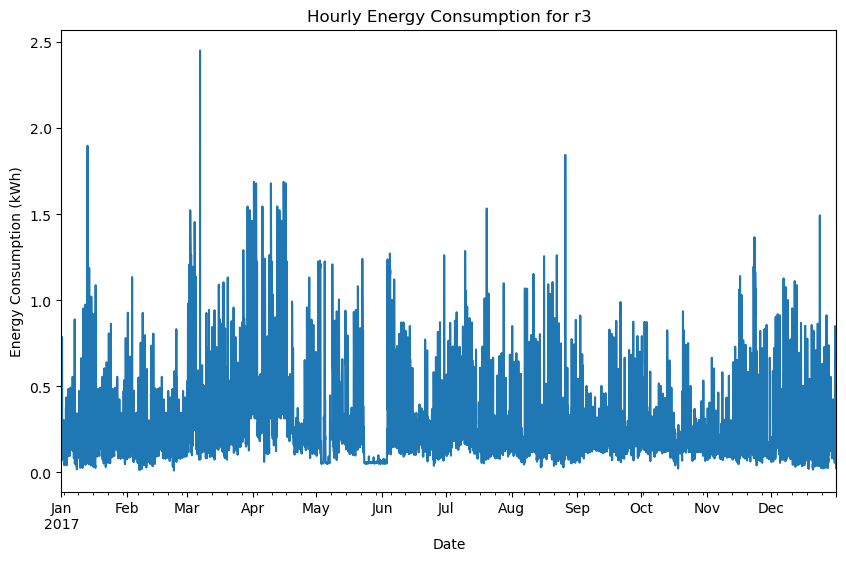

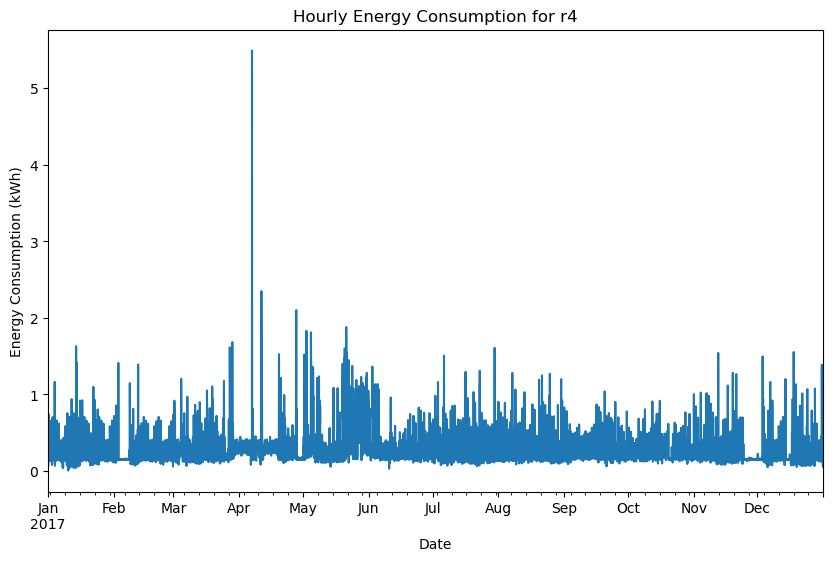

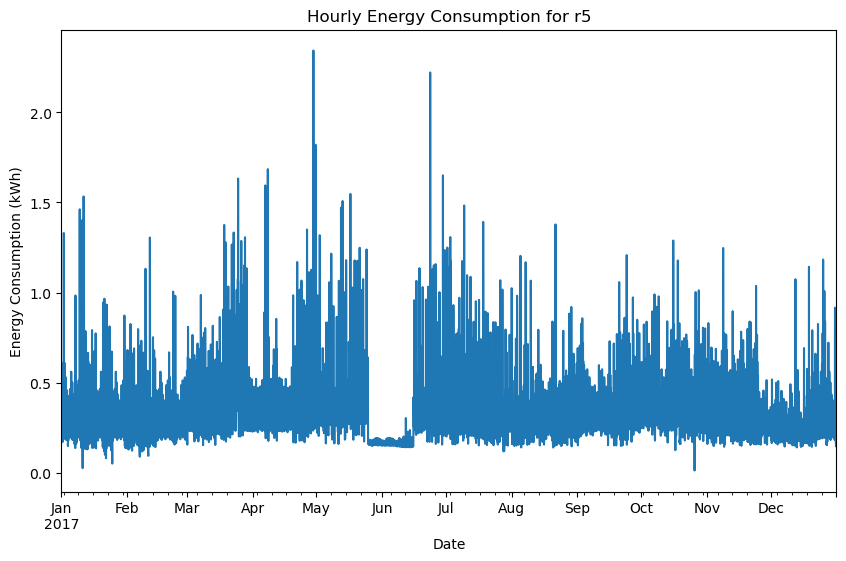

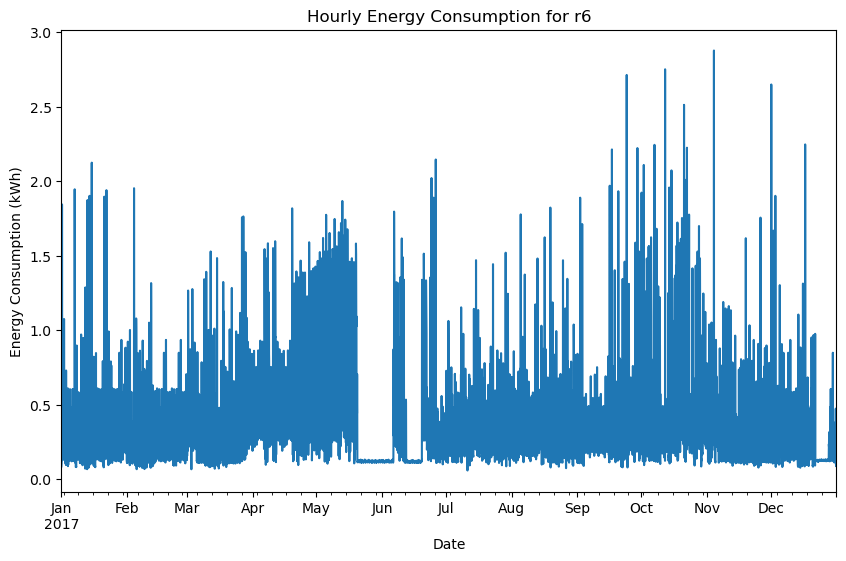

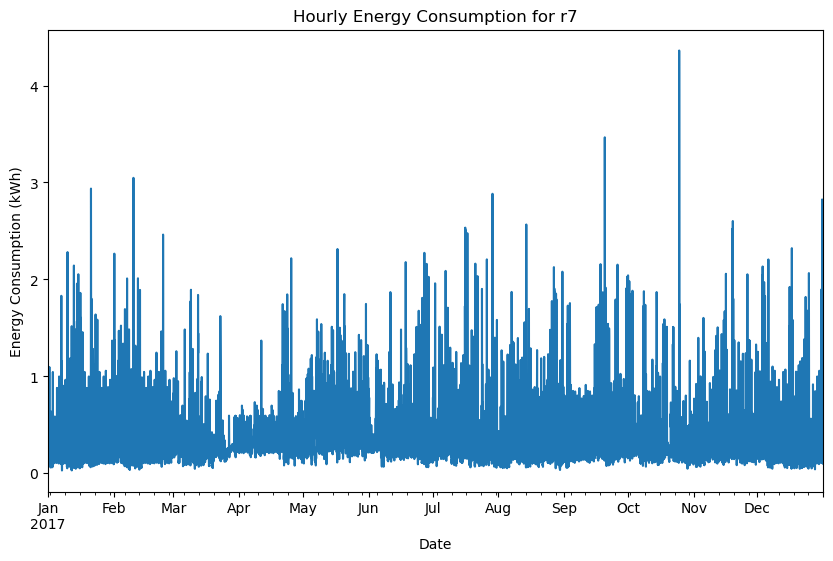

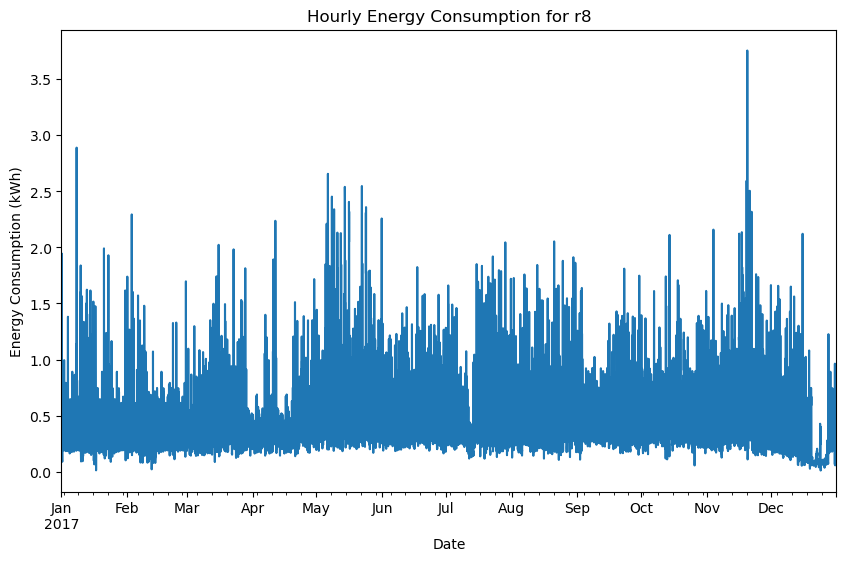

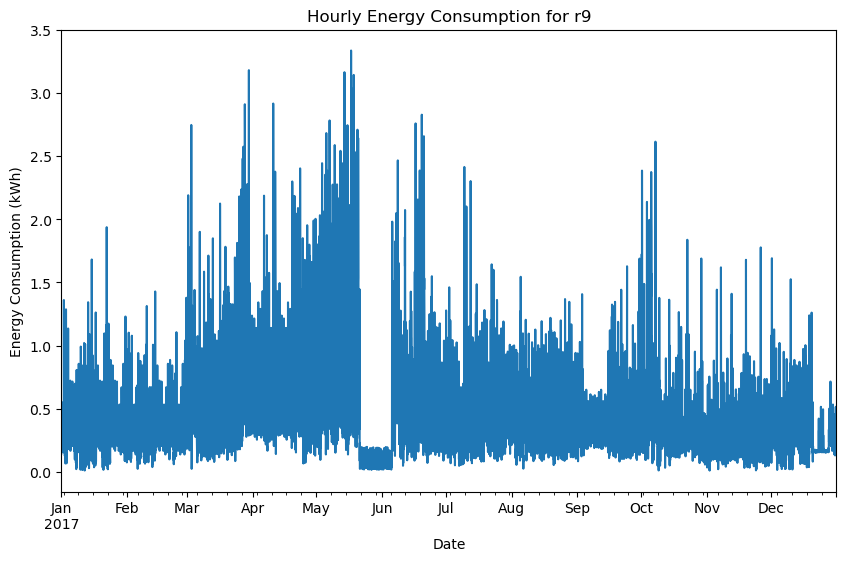

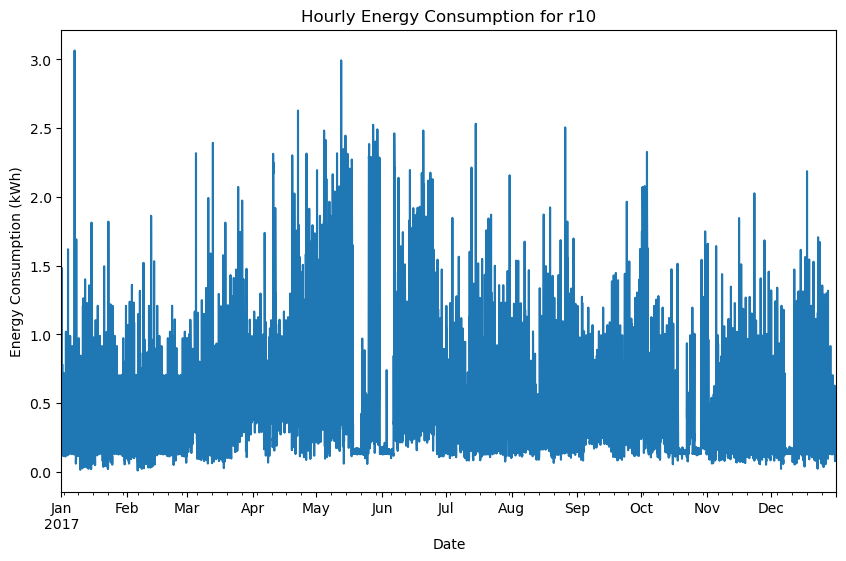

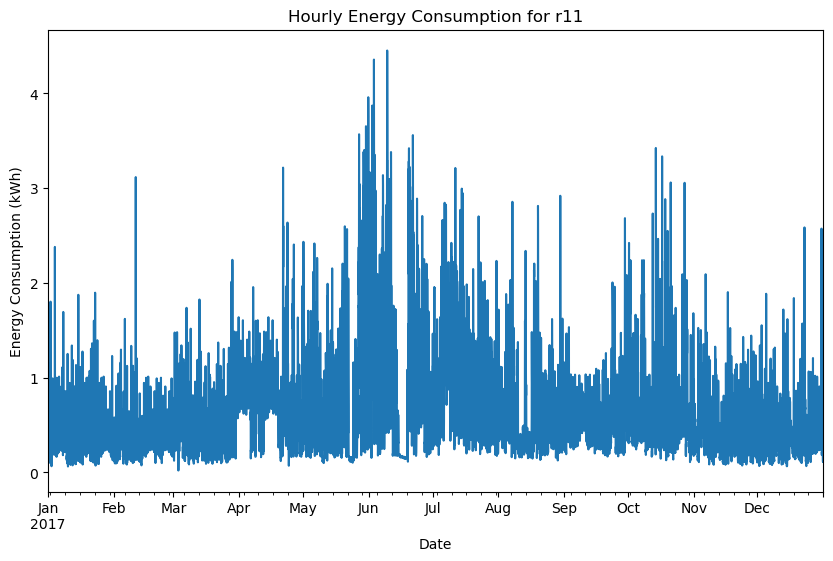

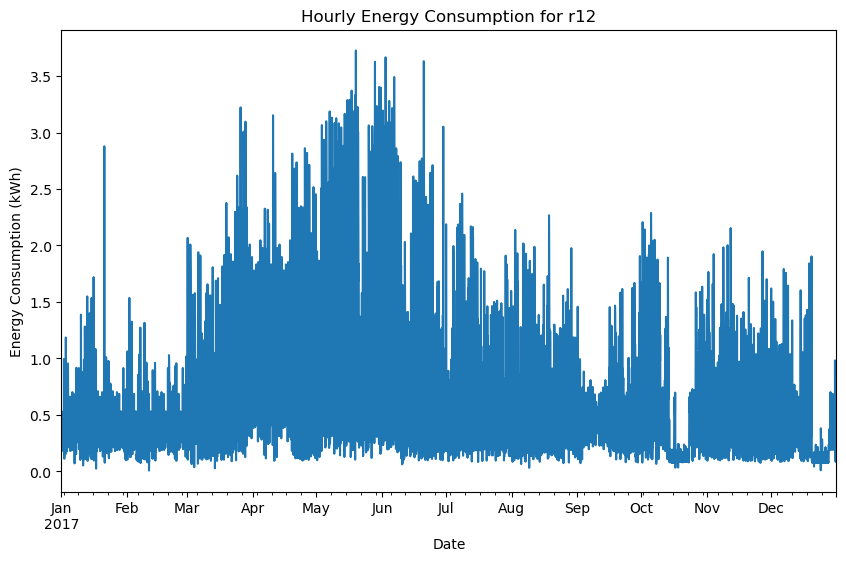

C:\Users\rvsre\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:458: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / n / c0


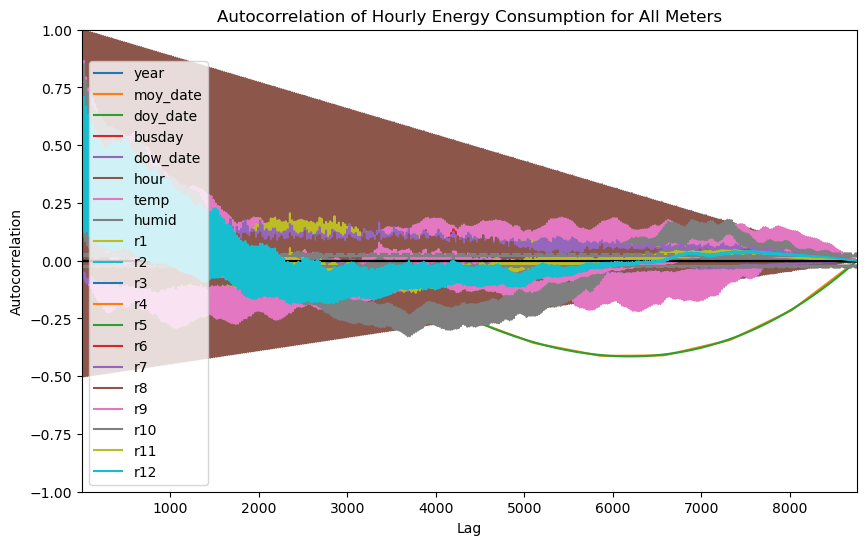

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('cons_data_all_res.xlsx', parse_dates=['Time'])

# Set the index to the timestamp column
data.set_index('Time', inplace=True)

# Resample the data to hourly frequency and calculate the mean
hourly_data = data.resample('H').mean()

# Print statistical descriptions of all the meters
print(hourly_data.describe())

# Create a grouped box plot to compare the hourly data between different meters
hourly_data.boxplot(column=['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12'], figsize=(10,6))
plt.xlabel('Meter')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Hourly Energy Consumption Comparison between Meters')
plt.show()

# Create a line plot of the hourly data for all the meters
# Create line plots of the hourly data for each meter separately
for meter in hourly_data.columns:
    hourly_data[meter].plot(figsize=(10,6))
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption (kWh)')
    plt.title(f'Hourly Energy Consumption for {meter}')
    plt.show()


# Perform autocorrelation analysis on the hourly data for all the meters
plt.figure(figsize=(10,6))
for col in hourly_data.columns:
    pd.plotting.autocorrelation_plot(hourly_data[col], label=col)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Hourly Energy Consumption for All Meters')
plt.legend()
plt.show()
